In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
%%time
#Getting data from kaggle
data = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')
data.head(7)


CPU times: user 46.9 ms, sys: 14.3 ms, total: 61.1 ms
Wall time: 82.7 ms


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0


In [3]:
#see there are some missing values as NaN. It may disrupt the model training then we need to ignore it.
data.dropna(axis=0,inplace = True) #axis:0 (it refers for row to be  deleted) #inplace:True (it refers for overwriting to existing DataFrame)
data.head(7)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra,-37.8085,144.9964,Northern Metropolitan,4019.0


In [4]:
# make built year more sense: [Age] = 2024 - Built Year
data['How old'] = [2024-each for each in data['YearBuilt']]
data.drop('YearBuilt', axis=1, inplace=True)
data.head(7)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,How old
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,124.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,124.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,10.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,114.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,134.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0,124.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,Yarra,-37.8085,144.9964,Northern Metropolitan,4019.0,19.0


In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'How old'],
      dtype='object')

In [6]:
#define the feature that will train the model.
feature = ['Rooms','Distance','Postcode','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'How old']
#define the output parameter that will be predicted and compared. 
output = ['Price']

X = data[feature]
y = data[output]

In [7]:
X.head(7)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,How old
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,124.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,124.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,10.0
6,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,114.0
7,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,134.0
9,2,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,-37.8010,144.9989,124.0
11,3,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,-37.8085,144.9964,19.0


In [8]:
#first of all, DecisionTreeClassifier will be used in training the model.
from sklearn.tree import DecisionTreeClassifier
#As your output is not binary classification, you can use these kind of metrics: MAE,MSE,RMSE,R-Squared
from sklearn.metrics import mean_absolute_error


#split the data to train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

#define the model that will train:
dt_model = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
dt_model.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = dt_model.predict(X_val)


# Calculate Mean Absolute Error
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 268052.0251775339


In [9]:
'''
I would like to display how the prediction and actual value are in table
For this, i need to make sure that y_val and y_pred must be the same format.
then migrate to Dataframe so that it can be displayed
'''
y_val_list = [each for each in y_val['Price']] #as seen that y_pred has numpy, it need to be list as y_val_list
print(len(y_val_list),len(y_pred))
print(type(y_val_list),type(y_pred),type(y_val_list))

1549 1549
<class 'list'> <class 'numpy.ndarray'> <class 'list'>


In [10]:
#as seen that y_pred has numpy, it need to be list as y_val_list
mydata = {'Predicted':y_pred,'Actual':y_val_list} #mydata = 
comparison=pd.DataFrame(mydata)
comparison.head(10)

,Predicted,Actual
0,604000.0,660000.0
1,1245000.0,800000.0
2,585000.0,525000.0
3,701000.0,790000.0
4,1362000.0,1200000.0
5,1050000.0,1015000.0
6,486000.0,500500.0
7,1148000.0,1199000.0
8,1150000.0,900000.0
9,2302000.0,2077000.0


**Mean Absolute Error:** 268052.0251775339

You can see that the trained model is validating and then predicting as very complex results. <font color="red"> The output is not binary classification.</font> That's why, accurary is not used here. <font color="red"> What if it is used, the accuracy will be very small because that here is a approximation, not getting exact value such as 0 or 1:</font>

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.009038089089735314


Text(0, 0.5, 'FEATURE NAMES')

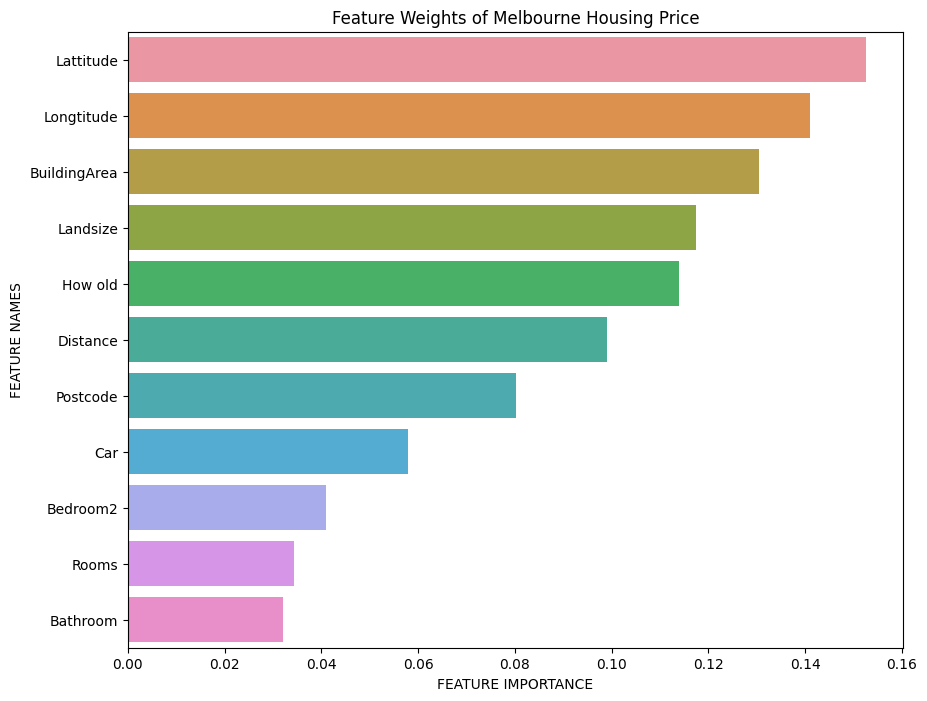

In [12]:
#Lets see the weight of features to results in prediction

#setting libraries on
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = dt_model.feature_importances_
features = X.columns
weight_data ={'feature_names':features,'feature_importance':importances}
weight_data = pd.DataFrame(weight_data)

weight_data.sort_values(by = ['feature_importance'],ascending = False, inplace=True)


plt.figure(figsize=(10,8))
sns.barplot(x=weight_data['feature_importance'], y = weight_data['feature_names'])
plt.title('Feature Weights of Melbourne Housing Price')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
